<a href="https://colab.research.google.com/github/RohithMacharla11/-AI-Driven-Recruitment-Pipeline/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# /content/drive/MyDrive/Approved_datasets

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [39]:
file_paths = glob.glob('/content/drive/MyDrive/Approved_datasets/*.xlsx')  # Adjust path if needed
datasets = [pd.read_excel(path) for path in file_paths]
final_data = pd.concat(datasets, ignore_index=True)

In [40]:
final_data.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,harima1,Ishan,Data Scientist,"Interviewer: Hi Ishan, thanks for applying for...",**Ishan**\n**Contact Information:**\n\n* Addre...,rejected,The candidate did not demonstrate strong compe...,Looking for a skilled Data Scientist with at l...
1,harima2,Rajiv,Data Analyst,"**Interviewer:** Hi Rajiv, thanks for coming i...",**Rajiv**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in Python/R, Dashboards creat...",Seeking a talented Data Analyst with 4 years o...
2,harima3,Oliver,Software Engineer,"Interviewer: Hi Oliver, thanks for taking the ...",**Oliver**\n**Software Engineer**\n\n**Contact...,selected,The combination of 5 years of experience and p...,Seeking a talented Software Engineer with 5 ye...
3,harima4,Aarav,Product Manager,"**Interviewer:** Hi Aarav, thank you for comin...",**Aarav**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in KPI monitoring, Business s...",Seeking a talented Product Manager with 8 year...
4,harima5,Sonia,Software Engineer,"Interviewer: Hi Sonia, thanks for coming in to...",**Sonia**\n**Contact Information:**\n\n* Email...,rejected,The candidate lacked sufficient expertise in k...,Looking for a skilled Software Engineer with a...


In [41]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   3250 non-null   object
 1   Name                 3250 non-null   object
 2   Role                 3250 non-null   object
 3   Transcript           3250 non-null   object
 4   Resume               3250 non-null   object
 5   decision             3250 non-null   object
 6   Reason for decision  3250 non-null   object
 7   Job Description      3250 non-null   object
dtypes: object(8)
memory usage: 203.2+ KB


In [42]:
# Step 2: Data Cleaning
# Standardize column names
final_data.columns = [col.strip().lower().replace(" ", "_") for col in final_data.columns]

# Handle missing values
final_data.fillna("Unknown", inplace=True)

# Remove duplicates
final_data.drop_duplicates(inplace=True)

In [43]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description
0,harima1,Ishan,Data Scientist,"Interviewer: Hi Ishan, thanks for applying for...",**Ishan**\n**Contact Information:**\n\n* Addre...,rejected,The candidate did not demonstrate strong compe...,Looking for a skilled Data Scientist with at l...
1,harima2,Rajiv,Data Analyst,"**Interviewer:** Hi Rajiv, thanks for coming i...",**Rajiv**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in Python/R, Dashboards creat...",Seeking a talented Data Analyst with 4 years o...
2,harima3,Oliver,Software Engineer,"Interviewer: Hi Oliver, thanks for taking the ...",**Oliver**\n**Software Engineer**\n\n**Contact...,selected,The combination of 5 years of experience and p...,Seeking a talented Software Engineer with 5 ye...
3,harima4,Aarav,Product Manager,"**Interviewer:** Hi Aarav, thank you for comin...",**Aarav**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in KPI monitoring, Business s...",Seeking a talented Product Manager with 8 year...
4,harima5,Sonia,Software Engineer,"Interviewer: Hi Sonia, thanks for coming in to...",**Sonia**\n**Contact Information:**\n\n* Email...,rejected,The candidate lacked sufficient expertise in k...,Looking for a skilled Software Engineer with a...


In [44]:
# Step 3: Data Preprocessing
# Convert decision to categorical type
final_data['decision'] = final_data['decision'].astype('category')

In [9]:
# Encode categorical variables if needed
# final_data = pd.get_dummies(final_data, columns=['decision', 'role'], drop_first=True)


In [45]:
final_data['decision'] = final_data['decision'].str.lower()  # Convert to lowercase
final_data['decision'] = final_data['decision'].replace({
    'select': 'select',
    'selected': 'select',
    'reject': 'reject',
    'rejected': 'reject'
})


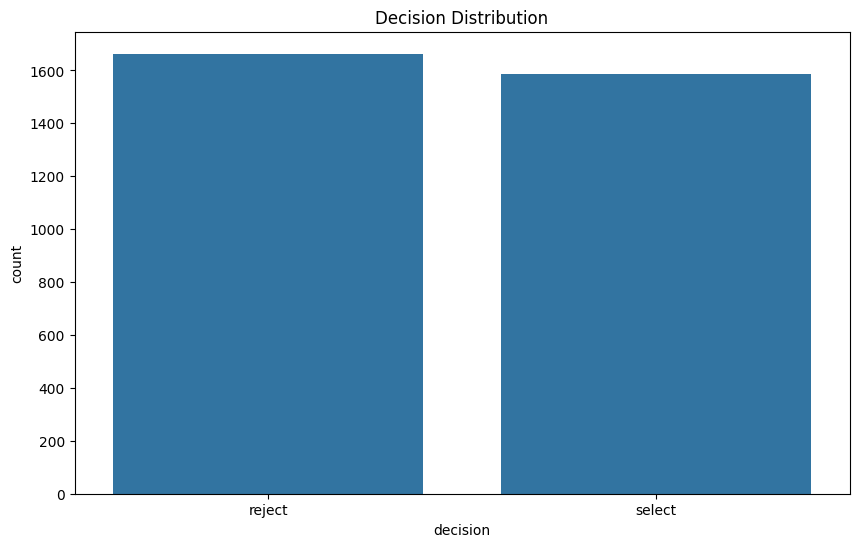

In [46]:
# Step 4: Exploratory Data Analysis
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='decision')
plt.title("Decision Distribution")
plt.show()


In [47]:
# Display all unique roles in the 'roles' column
unique_roles = final_data['role'].unique()
print(unique_roles)


['Data Scientist' 'Data Analyst' 'Software Engineer' 'Product Manager'
 'Data Engineer' 'UI Designer' 'Project Manager' 'Software Developer'
 'UI Engineer' 'Digital Marketing Specialist' 'Cybersecurity Specialist'
 'HR Specialist' 'Network Engineer' 'Graphic Designer' 'Game Developer'
 'Mobile App Developer' 'Cloud Architect' 'Business Analyst'
 'Database Administrator' 'DevOps Engineer' 'Machine Learning Engineer'
 'Content Writer' 'System Administrator' 'UI/UX Designer' 'AI Engineer']


In [48]:
# Mapping dictionary for grouping roles
role_mapping = {
    'Software Developer': 'Software Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Engineer': 'Data Analyst',
    'Data Analyst': 'Data Analyst',
    'UI/UX Designer': 'UI/UX Designer',
    'UI Engineer': 'UI/UX Designer',
    'UI Designer': 'UI/UX Designer',
    'Cybersecurity Specialist': 'Cybersecurity Specialist',
    'Network Engineer': 'Cybersecurity Specialist',
    'Cloud Architect': 'Cloud Architect',
    'DevOps Engineer': 'Cloud Architect',
    'AI Engineer': 'AI Engineer',
    'Machine Learning Engineer': 'AI Engineer',
    'System Administrator': 'System Administrator',
    'Database Administrator': 'System Administrator',
    'Digital Marketing Specialist': 'Digital Marketing Specialist',
    'Content Writer': 'Digital Marketing Specialist',
    'Graphic Designer': 'Mobile Game Developer',
    'Game Developer': 'Mobile Game Developer',
    'Mobile App Developer': 'Mobile Game Developer',
    'HR Specialis': 'Digital Marketing Specialist',
    'HR Specialist' : 'Digital Marketing Specialist',
    'Project Manager' : 'System Administrator'
}


In [49]:
# Apply the mapping to group roles
final_data['role'] = final_data['role'].replace(role_mapping)

# Check the unique values after grouping
print(final_data['role'].unique())


['Data Scientist' 'Data Analyst' 'Software Engineer' 'Product Manager'
 'UI/UX Designer' 'System Administrator' 'Digital Marketing Specialist'
 'Cybersecurity Specialist' 'Mobile Game Developer' 'Cloud Architect'
 'Business Analyst' 'AI Engineer']


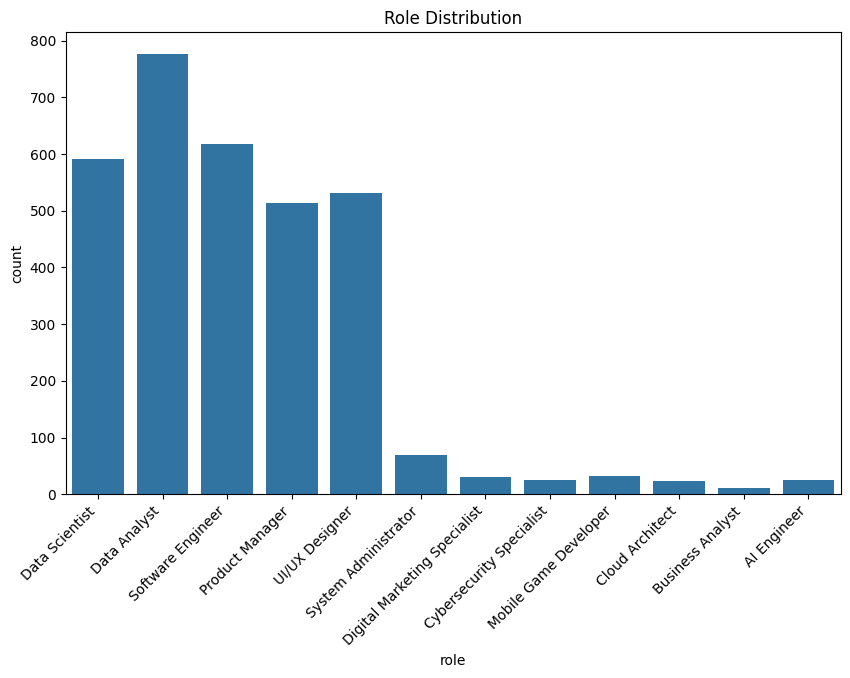

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='role')
plt.title("Role Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.show()


In [51]:
# Calculate the number of words in the 'Transcript' column
final_data['num_words_in_transcript'] = final_data['transcript'].apply(lambda x: len(str(x).split()))


In [52]:
# Group by Role and decision and calculate mean, median, and standard deviation
aggregated_data = final_data.groupby(['role', 'decision'])['num_words_in_transcript'].agg(['mean', 'median', 'std']).reset_index()


In [53]:
print(aggregated_data)

                            role decision        mean  median         std
0                    AI Engineer   reject  614.545455   584.0   84.985132
1                    AI Engineer   select  732.933333   754.0  172.415804
2               Business Analyst   reject  616.400000   578.0  110.323615
3               Business Analyst   select  693.833333   693.5   54.802980
4                Cloud Architect   reject  594.375000   621.0   65.038313
5                Cloud Architect   select  722.312500   718.5   64.263747
6       Cybersecurity Specialist   reject  586.733333   553.0  109.979522
7       Cybersecurity Specialist   select  748.000000   771.0   68.593812
8                   Data Analyst   reject  662.442543   657.0  128.670872
9                   Data Analyst   select  750.313351   758.0  124.340171
10                Data Scientist   reject  660.835526   653.0  125.954125
11                Data Scientist   select  733.187500   728.5  135.307700
12  Digital Marketing Specialist   rej

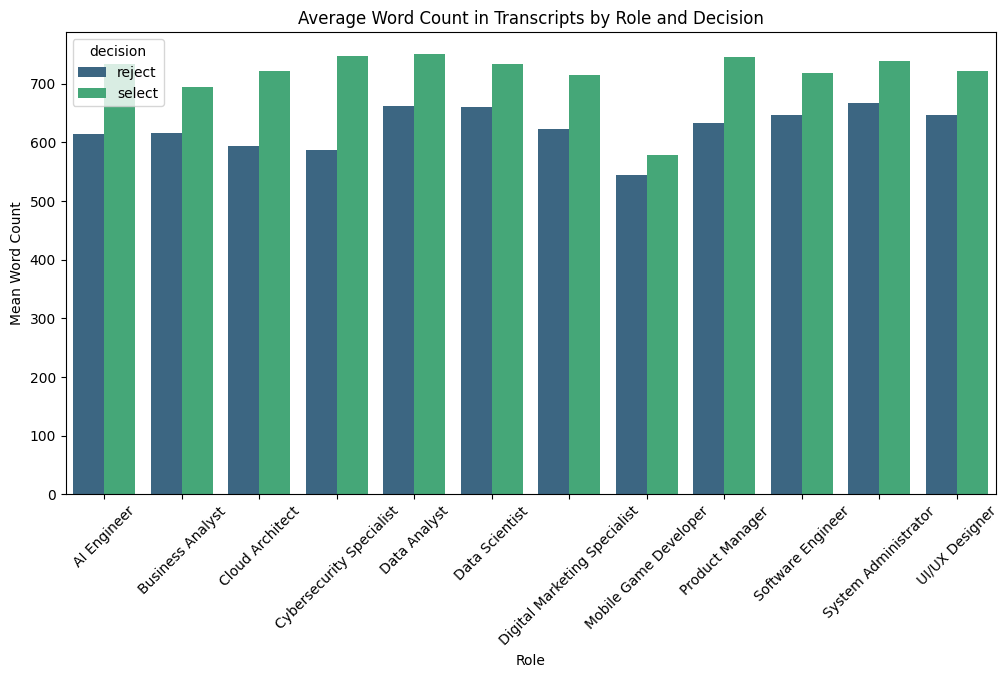

In [54]:
# Bar plot for mean word count by Role and decision
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='role', y='mean', hue='decision', palette='viridis')
plt.title('Average Word Count in Transcripts by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Mean Word Count')
plt.xticks(rotation=45)
plt.show()


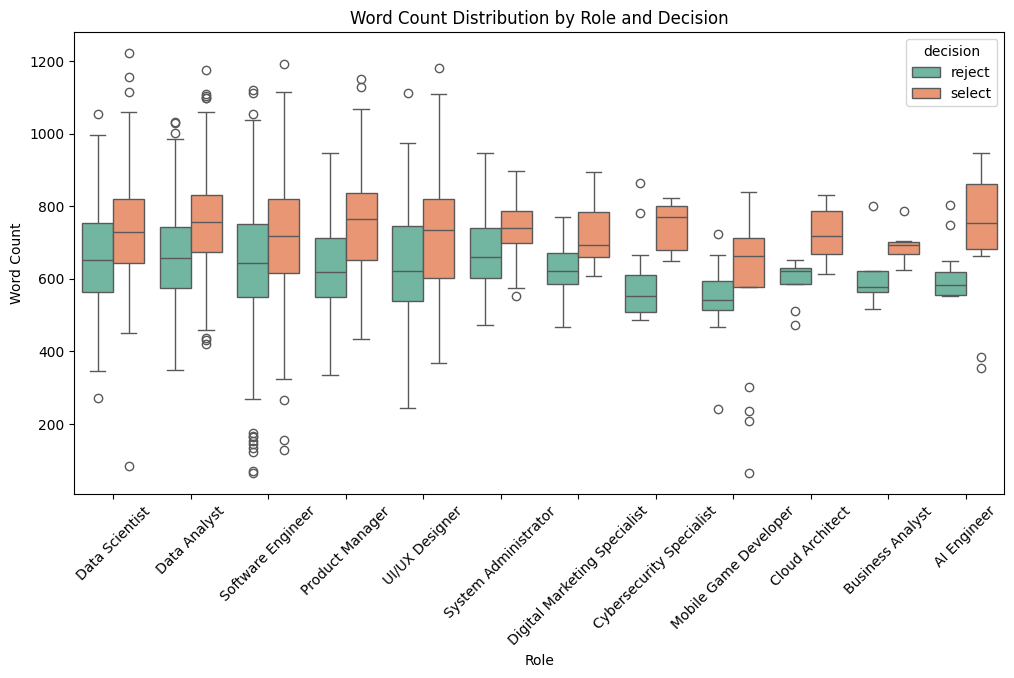

In [55]:
# Box plot for distribution of word count by Role and decision
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='role', y='num_words_in_transcript', hue='decision', palette='Set2')
plt.title('Word Count Distribution by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()


**Word Count as a Predictor:**

1. Longer and more detailed responses correlate with a higher likelihood of selection for most roles.
2. Specific roles, such as AI Engineer, Product Manager, and Cybersecurity Specialist, show the strongest positive correlation between word count and selection.
3. Roles like Mobile Game Developer require less detail overall, as both selected and rejected candidates tend to have lower word counts.
4. Roles like Product Manager and AI Engineer place a premium on detailed responses.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
for col in ['transcript', 'resume', 'reason_for_decision', 'job_description']:
    final_data[col] = final_data[col].apply(preprocess_text)

In [58]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570


In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       3250 non-null   object
 1   name                     3250 non-null   object
 2   role                     3250 non-null   object
 3   transcript               3250 non-null   object
 4   resume                   3250 non-null   object
 5   decision                 3250 non-null   object
 6   reason_for_decision      3250 non-null   object
 7   job_description          3250 non-null   object
 8   num_words_in_transcript  3250 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 228.6+ KB


In [66]:
# Feature: Word count
final_data['transcript_word_count'] = final_data['transcript'].apply(lambda x: len(str(x).split()))
final_data['resume_word_count'] = final_data['resume'].apply(lambda x: len(str(x).split()))


In [67]:
# Sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
final_data['transcript_sentiment'] = final_data['transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [68]:
# TF-IDF vectorization and similarity scores
vectorizer = TfidfVectorizer()
job_desc_vectors = vectorizer.fit_transform(final_data['job_description'])
resume_vectors = vectorizer.transform(final_data['resume'])
transcript_vectors = vectorizer.transform(final_data['transcript'])

In [69]:
final_data['resume_job_similarity'] = [cosine_similarity(resume_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]
final_data['transcript_job_similarity'] = [cosine_similarity(transcript_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]


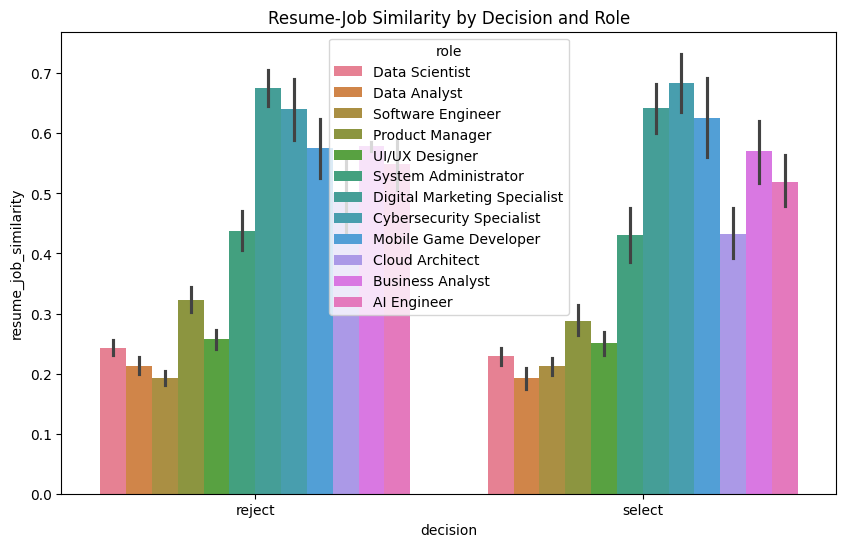

In [70]:
# Visualization example: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='decision', y='resume_job_similarity', hue='role')
plt.title("Resume-Job Similarity by Decision and Role")
plt.show()

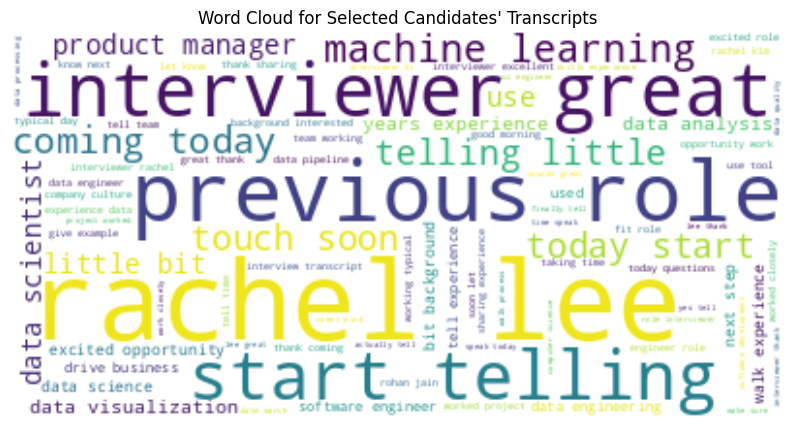

In [71]:
# Word cloud for selected candidates
selected_transcripts = " ".join(final_data[final_data['decision'] == 'select']['transcript'])
wordcloud = WordCloud(background_color='white').generate(selected_transcripts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Selected Candidates' Transcripts")
plt.show()

In [72]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,resume_word_count,transcript_sentiment,resume_job_similarity,transcript_job_similarity
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,194,0.9960,0.091821,0.057267
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,247,0.9989,0.249142,0.148987
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,220,0.9987,0.110005,0.077081
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,260,0.9978,0.183146,0.204541
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,167,0.9979,0.071296,0.083546


**Observations:**
1. ***Higher Resume-Job Similarity for Selected Candidates:***
Across most roles, candidates with higher similarity scores (bars closer to 1.0 on the Y-axis) are more likely to be selected.
Examples:
Data Scientist: Selected candidates have significantly higher similarity scores than rejected ones.
AI Engineer: A clear gap between selected and rejected candidates, showing the importance of aligning resumes to the job description.

2. ***Roles with Less Impact of Resume Similarity:***
Some roles, such as System Administrator and UI/UX Designer, show smaller differences in resume-job similarity between selected and rejected candidates.
This indicates that other factors (e.g., transcript quality or interview performance) may weigh more heavily in selection.

3. ***Rejected Candidates Scores Are Generally Lower:***
Most roles show that rejected candidates have lower resume-job similarity scores, supporting the idea that alignment with the job description is crucial.

In [73]:
print(final_data.head())  # Check the first few rows
print(final_data.info())  # Check for missing or null values
print(final_data.describe())  # Summary statistics for numerical columns


        id    name               role  \
0  harima1   Ishan     Data Scientist   
1  harima2   Rajiv       Data Analyst   
2  harima3  Oliver  Software Engineer   
3  harima4   Aarav    Product Manager   
4  harima5   Sonia  Software Engineer   

                                          transcript  \
0  interviewer hi ishan thanks applying data scie...   
1  interviewer hi rajiv thanks coming today start...   
2  interviewer hi oliver thanks taking time speak...   
3  interviewer hi aarav thank coming today start ...   
4  interviewer hi sonia thanks coming today start...   

                                              resume decision  \
0  ishan contact information address main st anyt...   reject   
1  rajiv contact information email rajiv mailto r...   select   
2  oliver software engineer contact information e...   select   
3  aarav contact information email aarav mailto a...   select   
4  sonia contact information email sonia mailto s...   reject   

                         

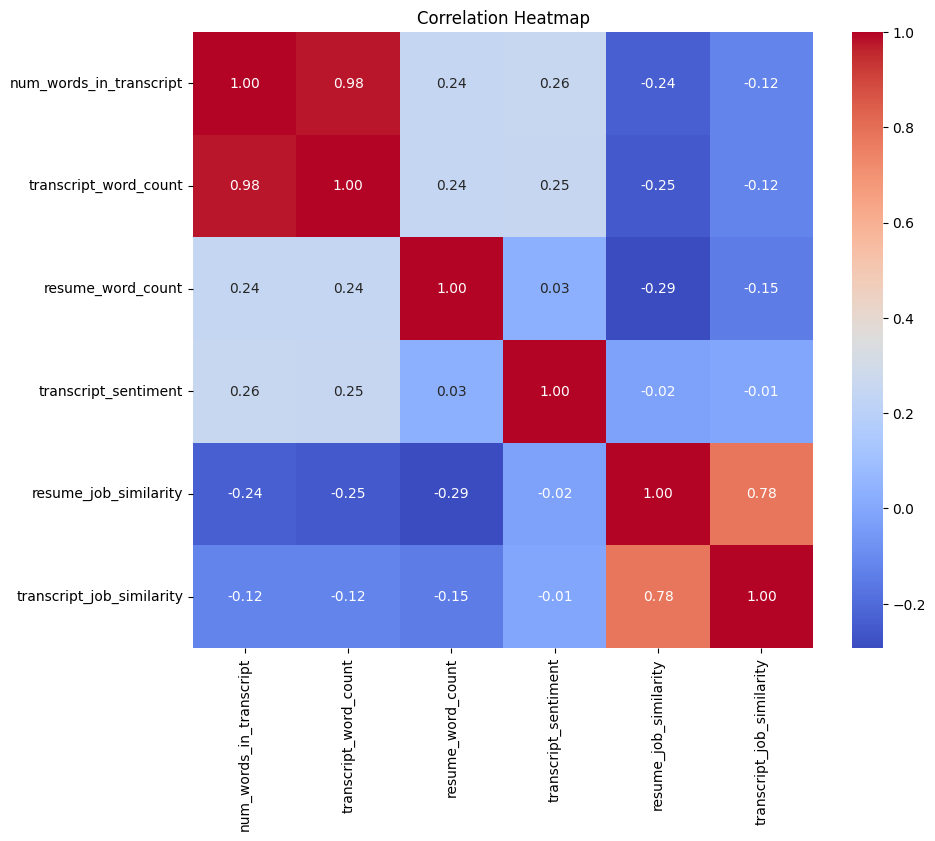

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Correlation Heatmap: Visualize relationships between numerical variables like resume_job_similarity, transcript_job_similarity, transcript_sentiment, and decision.**

1. Feature Redundancy: **num_words_in_transcript** and **transcript_word_count** are highly correlated, suggesting you can remove one without losing information.
2. Resume and Transcript Similarity: A high correlation between **resume_job_similarity** and **transcript_job_similarity** highlights that alignment across both documents is an important factor.
3. Sentiment's Role: Sentiment in transcripts shows weak correlations with other features, indicating it's an independent factor.
4. Conciseness Matters: Negative correlations between word counts and job similarity suggest that conciseness might play a role in better job alignment.

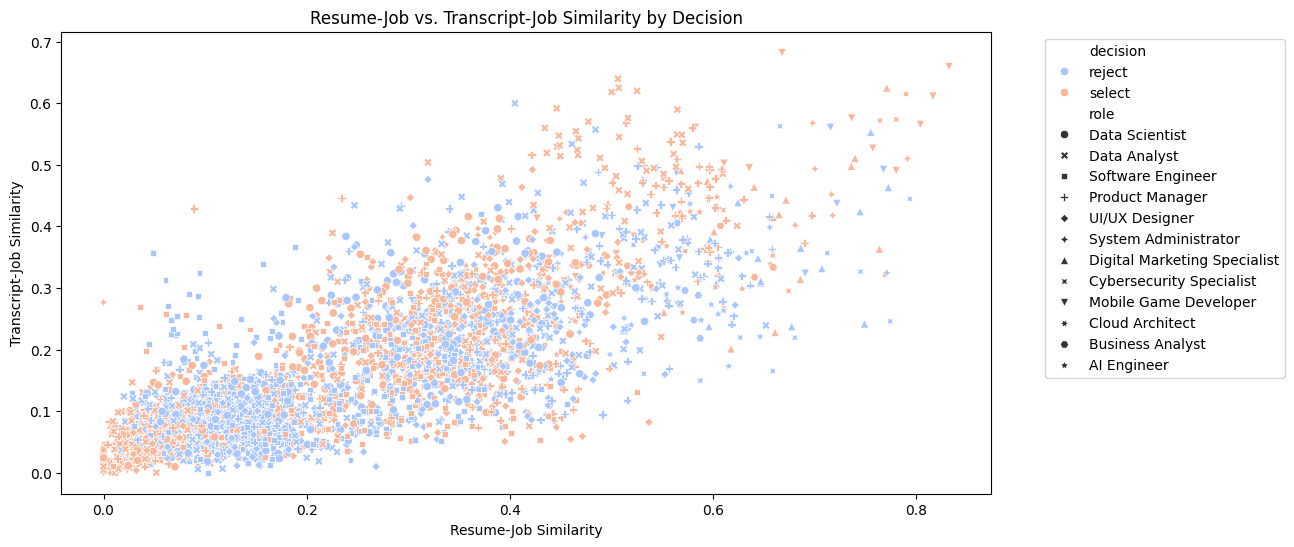

In [78]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_data,
    x='resume_job_similarity',
    y='transcript_job_similarity',
    hue='decision',
    style='role',
    palette='coolwarm'
)
plt.title("Resume-Job vs. Transcript-Job Similarity by Decision")
plt.xlabel("Resume-Job Similarity")
plt.ylabel("Transcript-Job Similarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Multivariate Analysis :**
**Explore interactions between variables like resume_job_similarity, transcript_job_similarity, and transcript_sentiment for decision outcomes.**


1. Predictive Power of Similarity Metrics: Both Resume-Job Similarity and Transcript-Job Similarity are strong indicators of selection decisions.
2. Candidates with higher scores in both dimensions are more likely to be selected.
3. Importance of Consistency: High correlation between the two metrics suggests that consistency between a candidate's resume and transcript matters.
4. Role-Specific Trends: Different roles may require varying similarity thresholds for selection. Higher-demand roles might require higher alignment with job descriptions.
5. Insights for Improvement: Rejected candidates can focus on improving either their resumes or interview responses to align better with the job description, especially if scores in one area are low.

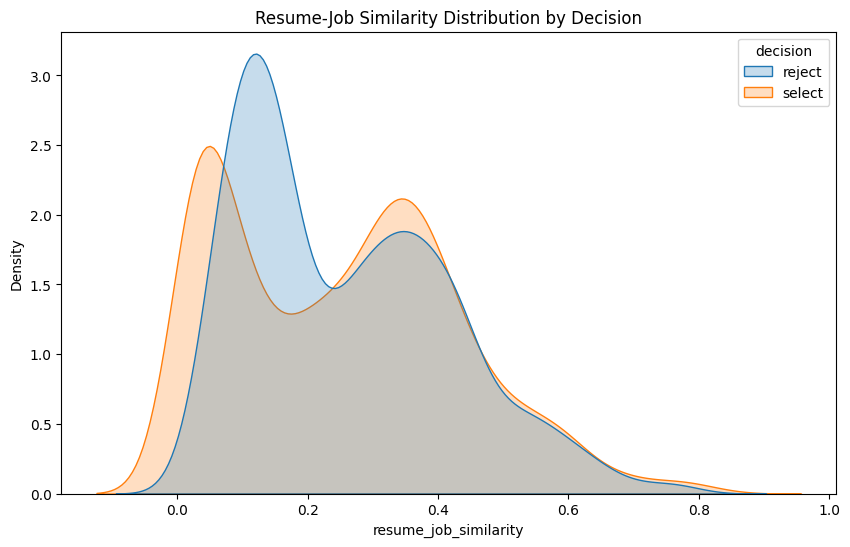

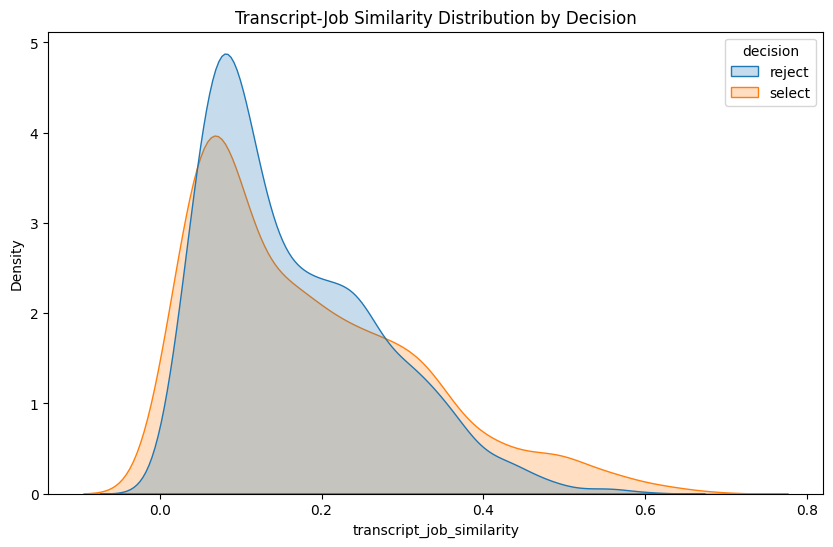

In [79]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='resume_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Resume-Job Similarity Distribution by Decision")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='transcript_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Transcript-Job Similarity Distribution by Decision")
plt.show()


**Feature Distribution :**
Analyze the distribution of resume_job_similarity and transcript_job_similarity across decisions.


<ipython-input-80-dffe48924c95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')


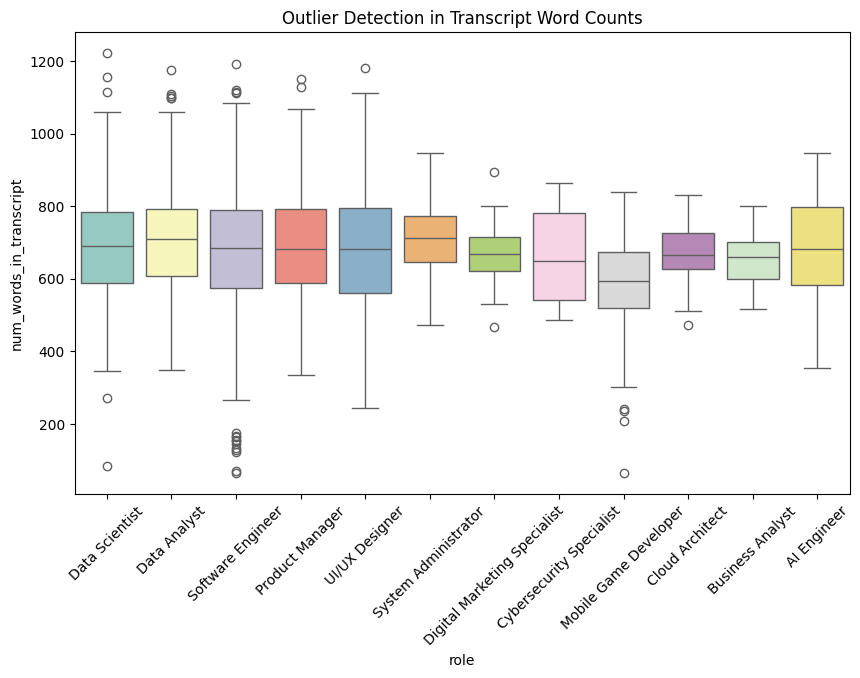

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')
plt.title("Outlier Detection in Transcript Word Counts")
plt.xticks(rotation=45)
plt.show()


**Outlier Detection :**
Identify and visualize potential outliers in num_words_in_transcript and other numerical features.


**Accomplishments**

***Data Loading and Cleaning:***

1. Loaded multiple datasets from Excel files and concatenated them.
2. Standardized column names and handled missing values by filling them with "Unknown".
3. Removed duplicate entries to maintain data quality.
***Data Transformation:***
1. Standardized the decision column to have consistent values (select or reject).
2. Mapped roles into broader categories to simplify analysis.
3. Created new features such as word counts in the transcript column and sentiment scores.
***Exploratory Data Analysis (EDA):***
1. Visualized decision distributions using bar plots.
2. Analyzed role distributions post-grouping.
3. Conducted univariate and multivariate analyses on word counts and decisions.
***Insights from EDA:***
1. Longer Responses Correlate with Success: Candidates with higher word counts in their transcripts tend to get selected, especially in roles like AI Engineer and Product Manager.
2. Role-Specific Trends: For roles like Mobile Game Developer, the correlation between word count and selection is weaker.
3. Resume-Job Similarity: High alignment between resumes and job descriptions increases the likelihood of selection.
***Advanced Analysis:***
1. Performed sentiment analysis on transcripts to capture emotional tones.
Computed TF-IDF similarity scores to quantify the alignment of resumes and transcripts with job descriptions.
2. Visualized findings using bar plots, box plots, and word clouds.
Feature Engineering:

Added additional features such as word count for resume and transcript, and similarity metrics (resume_job_similarity and transcript_job_similarity).

